# 全米を震撼させた ゾディアック事件の暗号を解く! 日本が舞台の歌劇を好んだ、20世紀の未解決凶悪事件犯

## ゾディアック暗号文字フォントを使い、 408 字暗号を文字列処理・表示・分析するコード例

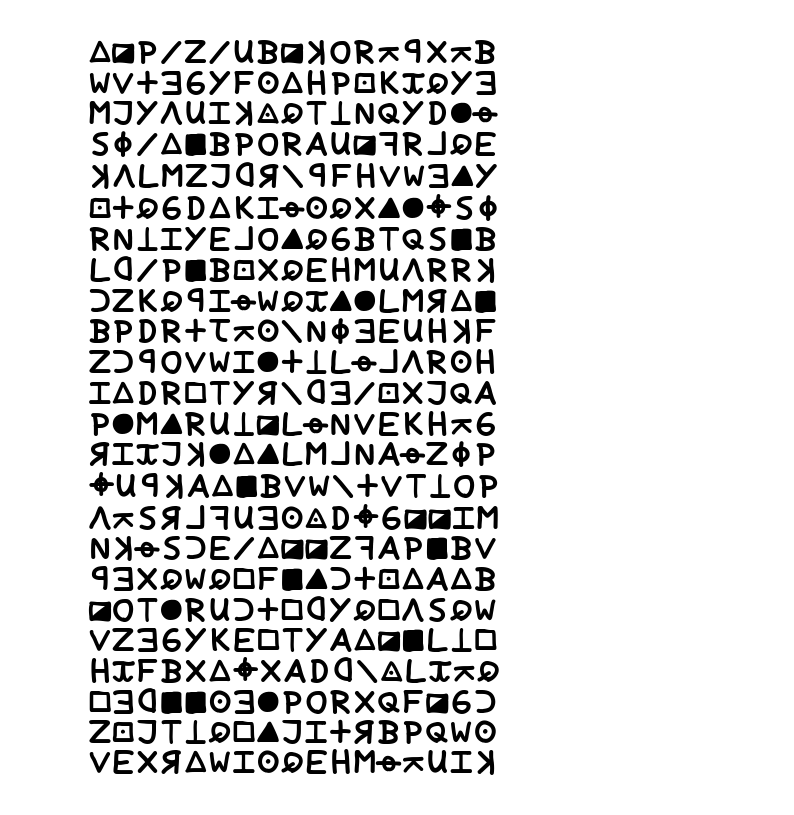

Z408暗号で使われている文字（記号）種数: 54


In [15]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 408字暗号 17列x24行(8行x3)
cipher_text_408 = R"""
9%P/Z/UB%kOR=pX=B
WV+eGYF69HP@K!qYe
MJY^UIk7qTtNQYD5)
S(/9#BPORAU%fRlqE
k^LMZJdr\pFHVWe8Y
@+qGD9KI)6qX85zS(
RNtIYElO8qGBTQS#B
Ld/P#B@XqEHMU^RRk
cZKqpI)Wq!85LMr9#
BPDR+j=6\N(eEUHkF
ZcpOVWI5+tL)l^R6H
I9DR_TYr\de/@XJQA
P5M8RUt%L)NVEKH=G
rI!Jk598LMlNA)Z(P
zUpkA9#BVW\+VTtOP
^=SrlfUe67DzG%%IM
Nk)ScE/9%%ZfAP#BV
peXqWq_F#8c+@9A9B
%OT5RUc+_dYq_^SqW
VZeGYKE_TYA9%#Lt_
H!FBX9zXADd\7L!=q
_ed##6e5PORXQF%Gc
Z@JTtq_8JI+rBPQW6
VEXr9WI6qEHM)=UIk
""" # 暗号表示関数
def show_message(text, font):
    plt.figure(figsize=(10, 10))
    plt.text(0.1+0.,0.,text,
         fontproperties=font,
         fontsize=29,ha='left')
    plt.axis('off'); plt.show()
# 表示用のゾディアック暗号フォント
zodiac_font_path='z340-z408-combined-font-monospaced-webfont.ttf'
zodiac_font_prop=FontProperties(fname=zodiac_font_path)
normal_font_path='SourceHanCodeJP-Bold.otf'#通常等幅フォント
normal_font_prop=FontProperties(fname=normal_font_path)
show_message(cipher_text_408,zodiac_font_prop)
# 使われている文字（記号）種数を分析する
symbols_in_408 = set(cipher_text_408.replace('\n',''))
print('Z408暗号で使われている文字（記号）種数:',len(symbols_in_408))

## 408 字暗号について、 各文字(54 種)の使用頻度を分析するコード例と出力結果

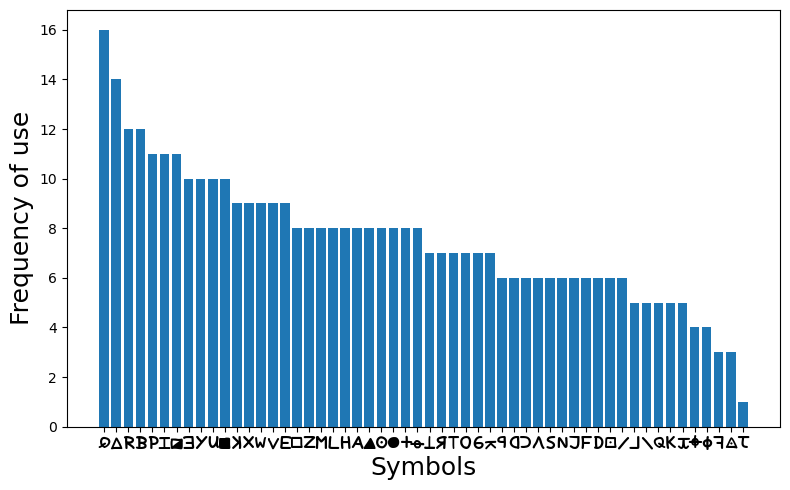

In [16]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# # 各文字（記号）が使われた回数を算出し、多い順にソートする
y=[cipher_text_408.count(c) for c in symbols_in_408]
zipped_list = zip(y, symbols_in_408)
y, symbols_in_408=zip(*sorted(zipped_list,reverse=True))
x = [i for i in range(len(symbols_in_408))]
# 棒グラフで描画する
fig, ax=plt.subplots(figsize=(8,5),tight_layout=True)
ax.bar(x,y,tick_label=symbols_in_408)
ax.set_xticklabels(symbols_in_408,
    fontproperties=zodiac_font_prop,fontsize=16)
ax.set_xlabel("Symbols",fontsize=18)
ax.set_ylabel("Frequency of use",fontsize=18);plt.show()

## 408 暗号から「2 連続する同文字」を探すと、 3ヵ所見つかる

In [17]:
from collections import Counter
# 「2つ連続する同じ文字」を抽出・カウント
def count_double_letters(s): 
    return Counter(s[i:i+2] for i in range(len(s)-1) if s[i]==s[i+1])

print("",count_double_letters(cipher_text_408.replace('\n','')))

 Counter({'%%': 2, 'RR': 1, '##': 1})


## 換字辞書を使い 408 字暗号を平文化するコード例

In [18]:
# 408字暗号の英文文字に割り当てられた文字（記号）
substitution_dict_408 = {
    'A': ['l','G','8','S'],
    'B': ['V'],
    'C': ['e'],
    'D': ['z','f'],
    'E': ['+','W','p','N','Z','6','E'],
    'F': ['J','Q'],
    'G': ['R'],         # 2回連続有
    'H': ['M',')'],
    'I': ['9','P','U','k'],
    'J': [],
    'K': ['/'],
    'L': ['%','#','B'], # '%'と'#'が、それぞれ2回連続有
    'M': ['q'],
    'N': ['O','(','^','D'],
    'O': ['d','T','X','!'],
    'P': ['='],
    'Q': [],
    'R': ['t','r','\\'],
    'S': ['F','K','7','@'],
    'T': ['5','L','H','I'],
    'U': ['Y'],
    'V': ['c'],
    'W': ['A'],
    'X': ['j'],
    'Y': ['_'],
    'Z': []
}
# 交換文字変換関数
def decrypt_symbol(cipher_text, substitution_dict):
    plain_text=""   # 平文
    used_symbols={} # 平文アルファベットの交換文字使用履歴
    symbols=[]      # 登場した交換文字
    for char in cipher_text:
        is_not_found=True
        if char=="\n":
            plain_text+="\n"
        else:
            for key,value in substitution_dict.items():
                # 交換文字に対応するアルファベットを算出する
                if char in value:
                    plain_text+=key;is_not_found=False
                    # 使われた交換文字一覧
                    if not char in symbols:
                        symbols.append(char)
                    # 平文の各文字にどの交換文字が使われたか
                    if key in used_symbols.keys():
                        used_symbols[key].append(char)
                    else:
                        used_symbols[key]=[char];break
    return plain_text, used_symbols, symbols
# 交換文字辞書を使って平文に変換する
plain_text_408,used_symbols_408,\
    symbols_408=decrypt_symbol(
    cipher_text_408,substitution_dict_408)
print(plain_text_408.replace('\n',''))

ILIKEKILLINGPEOPLEBECAUSEITISSOMUCHFUNITISMOREFUNTHANKILLINGWILDGAMEINTHEFORRESTBECAUSEMANISTHEMOATDANGERTUEANAMALOFALLTOKILLSOMETHINGGIVESMETHEMOATTHRILLINGEXPERENCEITISEVENBETTERTHANGETTINGYOURROCKSOFFWITHAGIRLTHEBESTPARTOFITIATHAEWHENIDIEIWILLBEREBORNINPARADICESNDALLTHEIHAVEKILLEDWILLBECOMEMYSLAVESIWILLNOTGIVEYOUMYNAMEBECAUSEYOUWILLTRYTOSLOIDOWNORSTOPMYCOLLECTINGOFSLAVESFORMYAFTERLIFEEBEORIETEMETHHPITI


## Z408暗号文と平文を画像化してみる

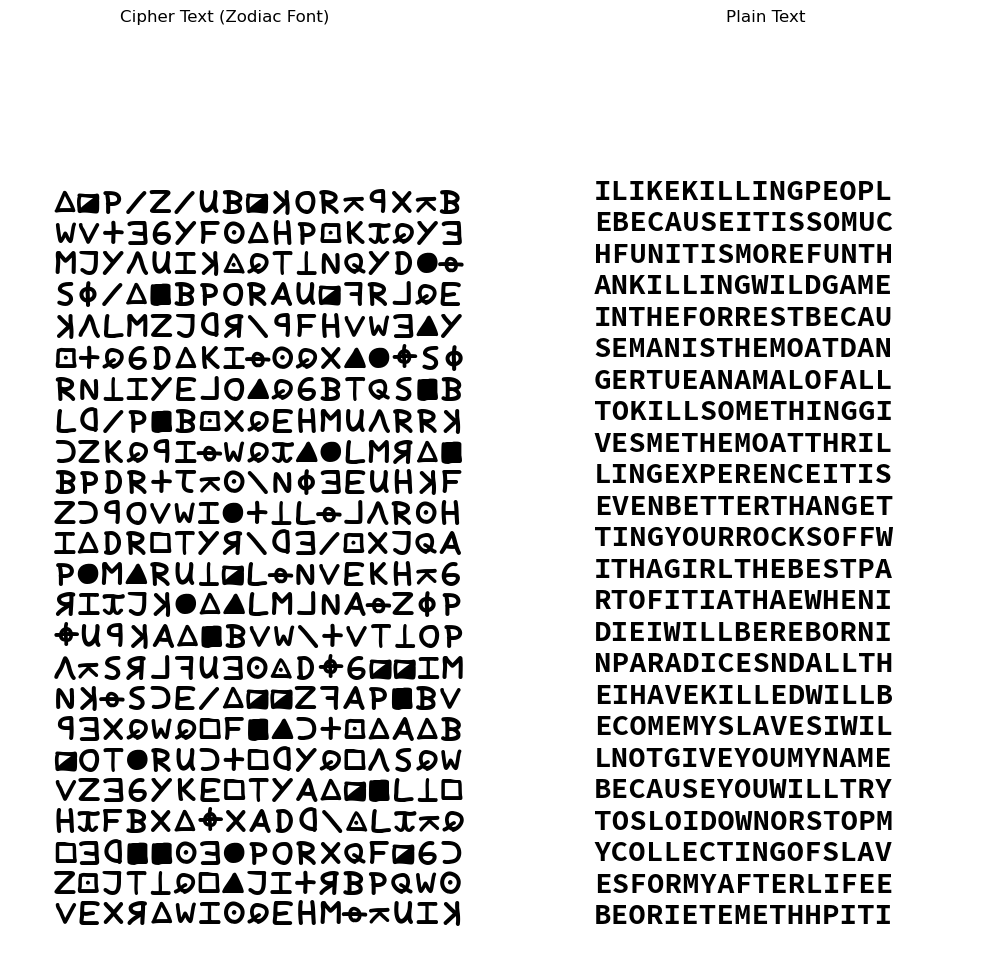

In [19]:
# グラフに暗号文と解読文を表示
plt.figure(figsize=(10, 10))

# 暗号文の表示
plt.subplot(1, 2, 1)
plt.text(0.1+0., 0., cipher_text_408,
         fontproperties=zodiac_font_prop,
         fontsize=29, ha='left')
plt.title('Cipher Text (Zodiac Font)')
plt.axis('off')

# 解読文の表示
plt.subplot(1, 2, 2)
plt.text(0.1+0., 0., plain_text_408,
         fontproperties=normal_font_prop,
         fontsize=19,ha='left')
plt.title('Plain Text')
plt.axis('off')

plt.tight_layout()
plt.show()

## Z340暗号を文字列化する

In [21]:
# ゾディアックZ340暗号 (c.f. http://zodiackillerciphers.com/combined-fonts/ciphers.html)
# 17列x20行(9行x2+2行)
# フォントとして、z340-z408-combined-font-monospaced-webfont.ttf前提
cipher_text_340 = R"""
HER>pl^VPk|1LTG2d
Np+B(#O%DWY.<*Kf)
By:cM+UZGW()L#zHJ
Spp7^l8*V3pO++RK2
_9M+ztjd|5FP+&4k/
p8R^FlO-*dCkF>2D(
#5+Kq%;2UcXGV.zL|
(G2Jfj#O+_NYz+@L9
d<M+b+ZR2FBcyA64K
-zlUV+^J+Op7<FBy-
U+R/5tE|DYBpbTMKO
2<clRJ|*5T4M.+&BF
z69Sy#+N|5FBc(;8R
lGFN^f524b.cV4t++
yBX1*:49CE>VUZ5-+
|c.3zBK(Op^.fMqG2
RcT+L16C<+FlWB|)L
++)WCzWcPOSHT/()p
|FkdW<7tB_YOB*-Cc
>MDHNpkSzZO8A|K;+
"""

# 使われたシンボルの総数
symbols_in_340 = set(cipher_text_340.replace('\n',''))
print('Z408暗号で使われているシンボルの数:',len(symbols_in_340))

Z408暗号で使われているシンボルの数: 63


## Z340の英文文字に割り当てられたシンボル

In [22]:
# Z340の英文文字に割り当てられたシンボル
# (c.f. https://commons.wikimedia.org/wiki/File:Zodiac_Z340_cipher_key.png)これ間違ってる？
# https://www.theregister.com/2024/04/04/zodiac_killer_code/
substitution_dict_340 = {
    'A': ['*','K','O','l','z'],
    'B': ['_','f'],
    'C': ['p'],
    'D': ['6','A','S'],
    'E': ['4','B','N','b','c','|'],
    'F': ['F'],
    'G': ['L'],
    'H': ['+'],
    'I': ['<','H','P','k','y'],
    'J': [],
    'K': [],
    'L': ['7','d','t'],
    'M': ['2'],
    'N': ['.','9','>','D','Y'],
    'O': ['M','R','V','^'],
    'P': ['8','j'],
    'Q': [],
    'R': ['1','E','T','X','Z'],
    'S': ['&','-','J','U'],
    'T': ['#','%','(',':',';','G'],
    'U': ['/','@','q'],
    'V': ['5'],
    'W': [')','W'],
    'X': [],
    'Y': ['3','C'],
    'Z': []
}

## Z340暗号のシンボル使用頻度

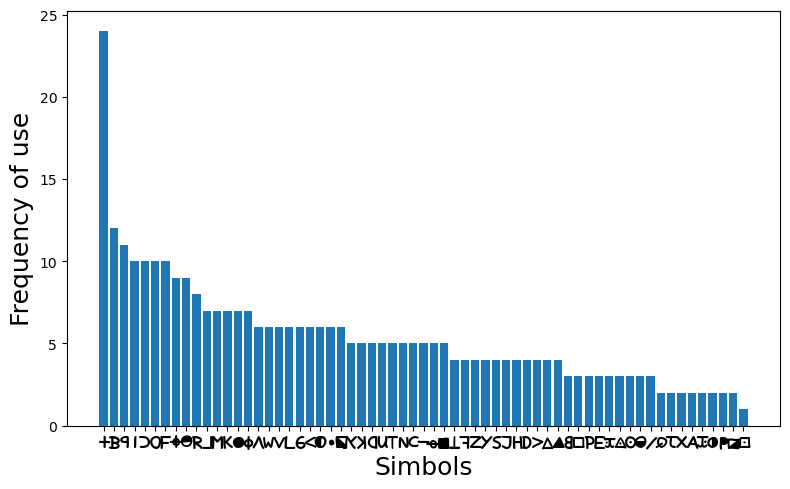

In [23]:
# 各シンボルが使われた回数
y=[cipher_text_340.count(c) for c in symbols_in_340]
zipped_list = zip(y, symbols_in_340)
y, symbols_in_340= zip(*sorted(zipped_list,reverse=True))
x = [i for i in range(len(symbols_in_340))]

# 頻度分布を棒グラフで描画する
fig, ax = plt.subplots(figsize=(8,5),tight_layout=True)
ax.bar(x, y, tick_label=symbols_in_340)
ax.set_xticklabels(symbols_in_340,
    fontproperties=zodiac_font_prop,fontsize=16)
ax.set_xlabel("Simbols",fontsize=18)
ax.set_ylabel("Frequency of use",fontsize=18)
plt.show()

## Z340暗号の暗号と平文を画像化する

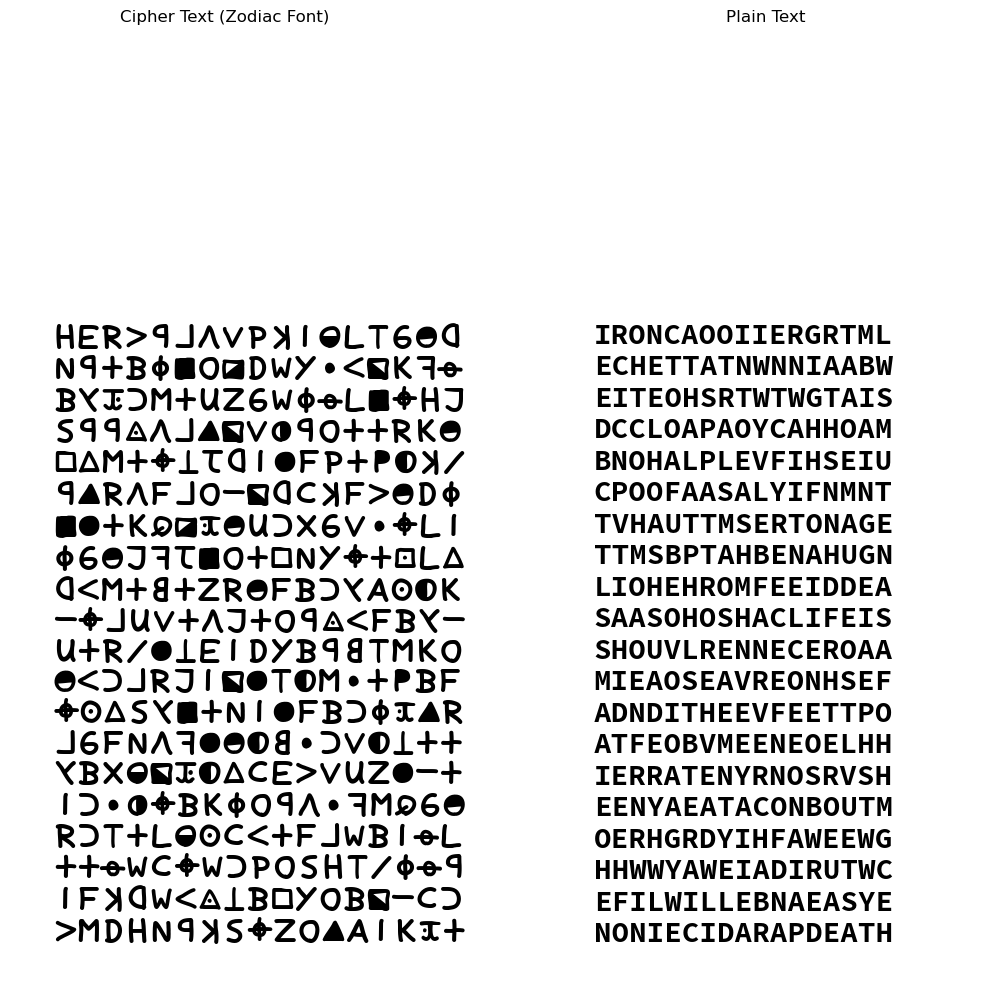

In [14]:
# シンボル変換してみる
plain_text_340,used_symbols_340,symbols_340 = decrypt_symbol(
    cipher_text_340, substitution_dict_340)

# グラフに暗号文と解読文を表示
plt.figure(figsize=(10, 10))

# 暗号文の表示
plt.subplot(1, 2, 1)
plt.text(0.1+0., 0., cipher_text_340,
         fontproperties=zodiac_font_prop, fontsize=29, ha='left')
plt.title('Cipher Text (Zodiac Font)')
plt.axis('off')

# 解読文の表示
plt.subplot(1, 2, 2)
plt.text(0.1+0., 0., plain_text_340,
         fontproperties=normal_font_prop, fontsize=19, ha='left')
plt.title('Plain Text')
plt.axis('off')

plt.tight_layout()
plt.show()


## 408字暗号の換字辞書と、各文字の使用頻度や使用順 を表示するコード例と出力結果

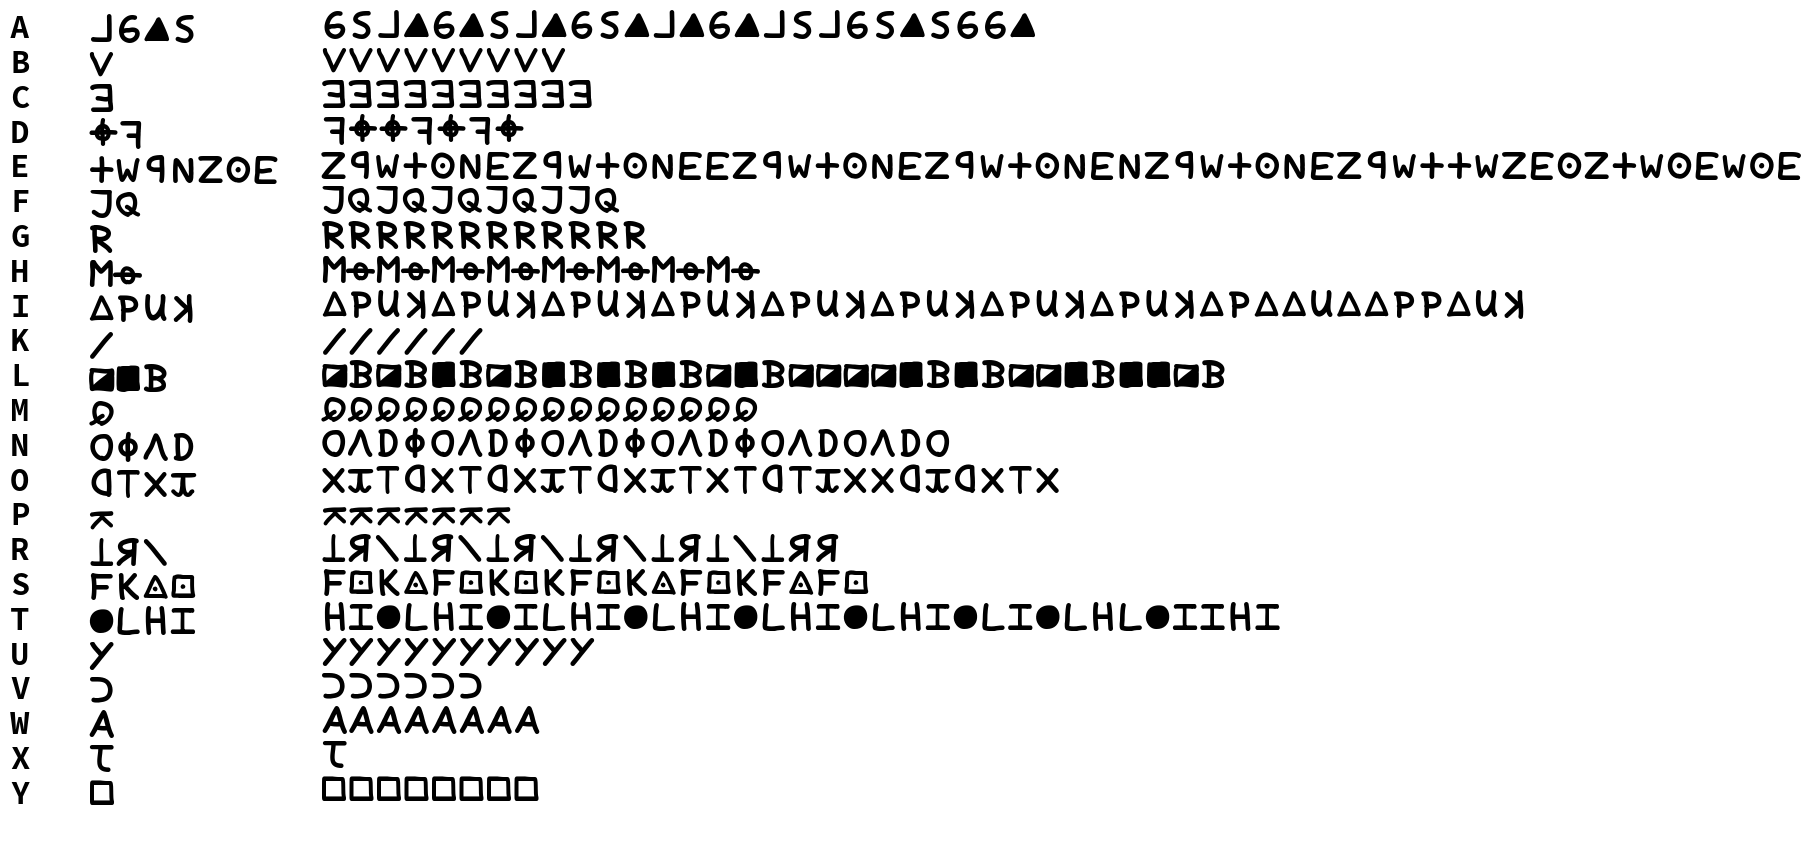

In [26]:
# アルファベット各文字にどの交換文字がどんな使用順で使われたか
keys=[];freq_408="";symbols4keys=[]
for key in sorted(used_symbols_408):#使用履歴辞書ソート
    keys.append(key)
    symbols4keys.append(
        "".join(substitution_dict_408[key]))
    freq_408+=(''.join(used_symbols_408[key])+'\n')
plt.figure(figsize=(10, 10))
# アルファベット各文字
plt.text(0.,0.05,'\n'.join(sorted(used_symbols_408)),
         fontproperties=normal_font_prop,fontsize=21, 
         ha='left',va='bottom'); plt.axis('off')
plt.text(0.1,0.055,'\n'.join(symbols4keys),# 交換文字
    fontproperties=zodiac_font_prop,fontsize=33, 
         ha='left',va='bottom'); plt.axis('off')         
plt.text(0.4, 0.015, freq_408,     # 交換文字使用履歴
    fontproperties=zodiac_font_prop,fontsize=33,
    ha='left',va='bottom');plt.axis('off');plt.show()


## 340 字暗号の転置パターン(読み出し順)をふまえて平文文字に戻すコード例・出力結果

In [24]:
import numpy as np
# 順序ファイル(17列x20行)を読み込む
order= np.loadtxt('order.csv',delimiter=",").astype(int)
order[0:9,:]=order[0:9,:]-1
order[9:18,:]=order[9:18,:]-154
order[18:20,:]=order[18:20,:]-307
# 順序ファイルにしたがって、文字順を入れ替える関数
def re_order(txt, order, part, is_fix=False):
    re_ordered_txt=''
    if part==0:
        part_txt=txt.replace('\n','')[0:17*9]
        part_order=order[0:9,:].reshape([17*9])
    if part==1:
        part_txt=txt.replace('\n','')[17*9:17*9*2]
        if is_fix:
            part_order=order[9:18,:].reshape([17*9])
        else:
            part_order=order[0:9,:].reshape([17*9])
    if part==2:
        part_txt=txt.replace('\n','')[17*9*2:]
        part_order=order[18:,:].reshape([17*2])
    for i in range(len(part_order)):
        re_ordered_txt+=part_txt[
            np.where(part_order==i)[0][0]]
    return(re_ordered_txt)
# 文字（記号）変換をする
plain_text_340,used_symbols_340,symbols_3409=\
    decrypt_symbol(cipher_text_340,substitution_dict_340)
# 暗号文の順番を変える
plain_text_340_with_step19=re_order(plain_text_340,order,0)\
    +re_order(plain_text_340,order,1,True)\
    +re_order(plain_text_340,order,2)
print(plain_text_340_with_step19)

IHOPEYOUAREHAVINGLOTSOFFANINTRYINGTOCATCHMETHATWASNTMEONTHETVSHOWWHICHBRINGOUPAPOINTABOUTMEIAMNOTAFRAIDOFTHEGASCHAMBERBECAASEITWILLSENDMETOPARADLCEALLTHESOOHERBECAUSEENOWHAVEENOUGHSLAVESTOWORVFORMEWHEREEVERYONEELSEHASNOTHINGWHENTHEYREACHPARADICESOTHEYAREAFRAIDOFDEATHIAMNOTAFRAIDBECAUSEIVNOWTHATMYNEWLIFEISLIFEWILLBEANEASYONEINPARADICEDEATH
